# Particle Filters Codelab

Below, we will implement a Particle Filter. You will have to implement the move, sense, and resample function.

In [13]:
# import statements
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# defining variables number of particles (N), weights, the landmarks for sensing, etc.
N = 3000
true_state = np.array([50, 50])
landmarks =  np.array([(np.random.random()*100, np.random.random()*100) for i in range(10)])
particles = np.array([(np.random.random()*100, np.random.random()*100) for i in range(N)])
weights = np.array([1. for i in range(N)])    

To make visualizations easier, we are defining a draw function for you. This will plot your true position in red, all of the particles in blue, and the landmarks in green. You may have to look closely!

Try running the below code to visualize the initial state.

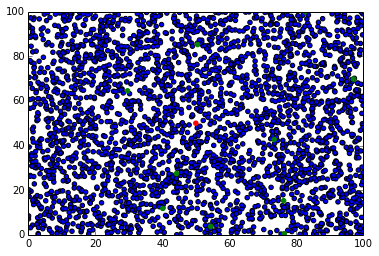

In [2]:
# draw method to help visualize everything
def draw():
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.scatter(particles[:,0], particles[:, 1])
    plt.scatter(landmarks[:,0], landmarks[:, 1], color='green')
    plt.scatter([true_state[0]], [true_state[1]], color='red')
    
draw()

Voila! We can see everything.

We will define the measurement function for you. In a nutshell, the measurement function gets the distance between the robot and all of the landmarks (and corrupts it with some `z_noise`). It then sorts this list, and returns the subset of the list that is less than or equal to `max_sense_dist` (defined below).

In [3]:
max_sense_dist = 60
z_noise = 4
def get_measurement(true_state):
    exp = np.apply_along_axis(lambda x: sqrt(x[0]**2 + x[1]**2), 1, landmarks - true_state) # get distances
    exp = np.sort(exp) + np.random.normal(scale=z_noise, size=exp.shape) # corrupt with noise
    return exp[exp <= max_sense_dist] # return the subset of the list that is <= max_sense_dist

Now, let's implement the sense function. As you can see by the function definition, the particles, weights of the particles, landmarks, and current measurement are passed in. Note that `weights[i]` refers to the particle at `particles[i]`. This function should iterate through all particles and for each one, get the expected measurement, sort the list (first 2 steps of `get_measurement` above), and then calculate the `P(particles measurement|z)`, or as we have normally been referring to it, `P(x|z)`. 

To use a normal probability density function, you can use `norm.pdf(p, scale=z_noise)`, where `p` is the difference between the expected measurement and `z`. Note that your expected measurement may be of a different size than `z` and to cope with this you will need to truncate on of the arrays. 

Once you compute `norm.pdf()`, multiply that by the corresponding weight to get the new weight. Don't forget to renormalize weights after doing calculations for all of your particles!

In [4]:
from math import sqrt
from scipy.stats import norm

def sense(particles, weights, landmarks, z):
    for i, particle in enumerate(particles):
        exp = np.apply_along_axis(lambda x: sqrt(x[0]**2 + x[1]**2), 1, landmarks - particle)
        exp = np.sort(exp)
        p = norm.pdf(z - exp[:z.size], scale=z_noise)
        weights[i] *= np.prod(p)
    weights /= np.sum(weights)

Next step: move function! The function takes your list of particles (`particles`) and `u`, the movement vector. Move all your particles by adding in `u` and some noise. We suggest you use `np.random.normal` with `scale=move_noise`. There is a way to make `np.random.normal` return an array so you can do all of this in one line - we'll let you use Google to figure that out!

In [5]:
move_noise = 1
def move(particles, u):
    particles += u + np.random.normal(scale=move_noise, size=particles.shape)

Now, for the coolest part of the particle filter, we need to program the resample step! In a nutshell, you need to pick new particles based on the weights of the last iteration. A particle should be resampled with probability relative to their weight over the total weight (should be 1). We suggest looking at the [np.cumsum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html) method to help you do this.

In [6]:
def resample(particles, weights):
    new_particles = np.zeros_like(particles)
    new_weights = np.zeros_like(weights)
    w_sum = np.cumsum(weights)
    for i in range(particles.shape[0]):
        c = np.random.random()
        j = np.argmax(w_sum > c)
        new_particles[i,:] = particles[j,:]
        new_weights[i] = weights[j]
    new_weights /= np.sum(new_weights)
    return new_particles, new_weights

Run the below cells to see the particle filter in action!

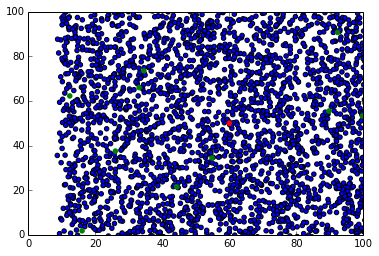

In [14]:
u = np.array([10, 0])
true_state += u
move(particles, u + np.random.normal(scale=move_noise, size=u.shape))

draw()

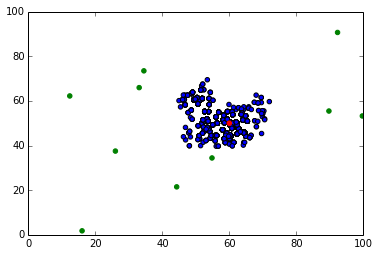

In [15]:
z = get_measurement(true_state)
sense(particles, weights, landmarks, z)
particles, weights = resample(particles, weights)
draw()


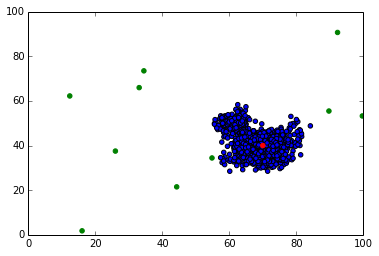

In [16]:
u = np.array([10, -10])
true_state += u
move(particles, u + np.random.normal(scale=move_noise, size=u.shape))

draw()

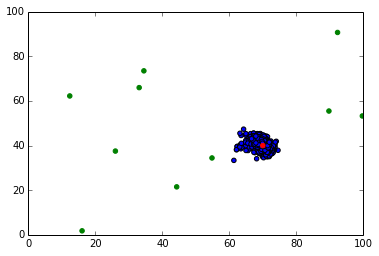

In [17]:
z = get_measurement(true_state)
sense(particles, weights, landmarks, z)
particles, weights = resample(particles, weights)

draw()

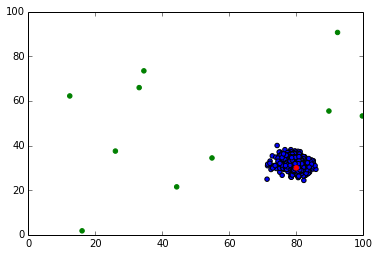

In [18]:
u = np.array([10, -10])
true_state += u
move(particles, u + np.random.normal(scale=move_noise, size=u.shape))

draw()

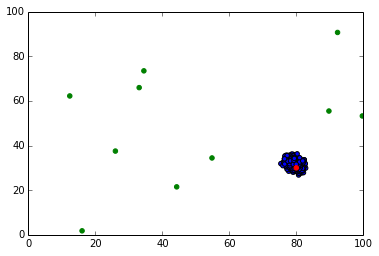

In [19]:
z = get_measurement(true_state)
sense(particles, weights, landmarks, z)
particles, weights = resample(particles, weights)
draw()